# Задание 1

Исходные данные:

In [1]:
import pandas

datas= pandas.read_csv('Davis.csv', index_col=0)
pandas.get_dummies(datas, columns=['sex'])

,weight,height,repwt,repht,sex_F,sex_M
1,77,182,77.0,180.0,0,1
2,58,161,51.0,159.0,1,0
3,53,161,54.0,158.0,1,0
4,68,177,70.0,175.0,0,1
5,59,157,59.0,155.0,1,0
...,...,...,...,...,...,...
196,74,175,71.0,175.0,0,1
197,83,180,80.0,180.0,0,1
198,81,175,NaN,NaN,0,1
199,90,181,91.0,178.0,0,1


# Разделить датасет на 2 выборки (train, test) из 100 человек, с сохранением пропорции полов

Вычислим пропорцию полов в исходном датасете и полученных выборках:

In [2]:
def count_rel(df):
    man = (df["sex_F"] <= 0).sum()
    women=(df["sex_M"] <= 0).sum()
    return man/(women+man)
df=pandas.get_dummies(datas, columns=['sex'])
print(count_rel(df))


0.44


In [3]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.5, stratify=df['sex_M'])
print(count_rel(train))
print(count_rel(test))

0.44
0.44


# Очистить выборки от выбросов - людей с нереалистичным ростом /весом

Посмотрим, в каких столбцах встречаются NaN значения

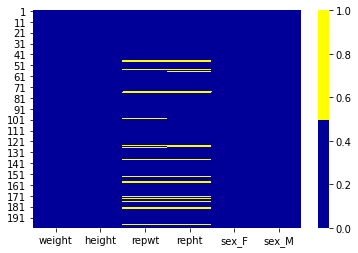

In [4]:
import seaborn as sns
cols = df.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Посмотрим описание значений столбцов

In [5]:
df[cols].describe()

,weight,height,repwt,repht,sex_F,sex_M
count,200.000000,200.000000,183.000000,183.000000,200.000000,200.000000
mean,65.800000,170.020000,65.622951,168.497268,0.560000,0.440000
std,15.095009,12.007937,13.776669,9.467048,0.497633,0.497633
min,39.000000,57.000000,41.000000,148.000000,0.000000,0.000000
25%,55.000000,164.000000,55.000000,160.500000,0.000000,0.000000
50%,63.000000,169.500000,63.000000,168.000000,1.000000,0.000000
75%,74.000000,177.250000,73.500000,175.000000,1.000000,1.000000
max,166.000000,197.000000,124.000000,200.000000,1.000000,1.000000


Построим столбчатые диаграммы каждого столбца, чтобы понять, какие значения являются неадекватными относительно других

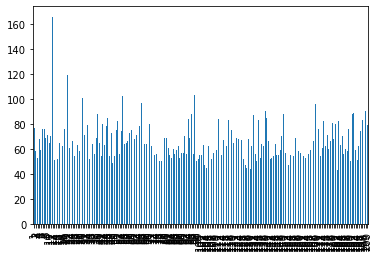

In [6]:
df['weight'].plot.bar()

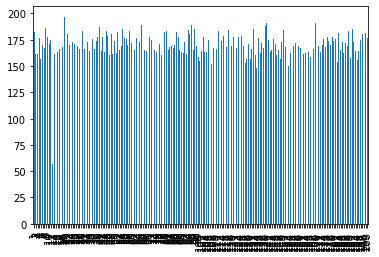

In [7]:
df['height'].plot.bar()

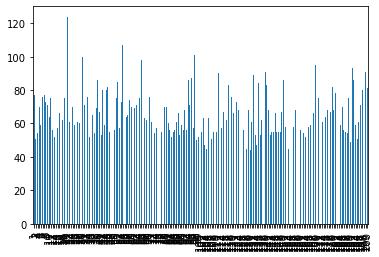

In [8]:
df['repwt'].plot.bar()

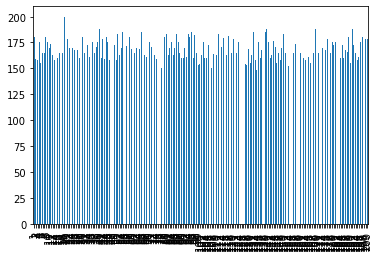

In [9]:
df['repht'].plot.bar()

Построим точечные графики зависимости роста от веса у мужчин и женщин, чтобы выявить неадекватные значения

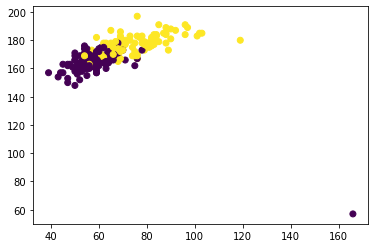

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df["weight"],df['height'], c= df['sex_M'])

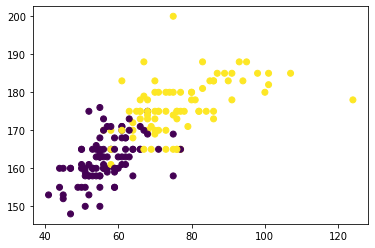

In [11]:
plt.scatter(df['repwt'], df['repht'], c= df['sex_M'])

Очистим train/test от вбросов и неопределенных значений

In [12]:
from scipy import stats
import numpy as np
train=train.dropna(axis=0)
train=train[(np.abs(stats.zscore(train)) < 2).all(axis=1)]
train

,weight,height,repwt,repht,sex_F,sex_M
32,75,178,73.0,175.0,0,1
68,64,164,62.0,161.0,1,0
6,76,170,76.0,165.0,0,1
95,88,189,87.0,185.0,0,1
83,53,169,52.0,175.0,1,0
...,...,...,...,...,...,...
16,65,166,66.0,165.0,1,0
74,56,163,57.0,159.0,1,0
86,59,182,61.0,183.0,0,1
168,66,166,66.0,165.0,1,0


In [13]:
test=test.dropna(axis=0)
test=test[(np.abs(stats.zscore(test)) < 2).all(axis=1)]
test

,weight,height,repwt,repht,sex_F,sex_M
136,53,162,53.0,160.0,1,0
92,56,161,56.0,161.0,1,0
22,61,170,61.0,170.0,1,0
81,61,165,60.0,163.0,1,0
98,50,169,50.0,165.0,1,0
...,...,...,...,...,...,...
162,54,161,54.0,160.0,1,0
42,80,178,80.0,178.0,0,1
56,65,176,64.0,172.0,0,1
37,56,166,54.0,165.0,1,0


# Отобразить train-выборку в виде точек на графике

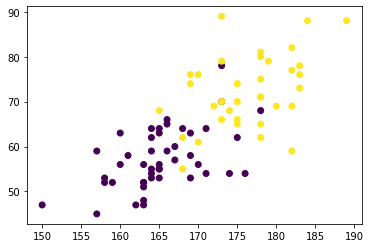

In [14]:
plt.scatter(train['height'], train['weight'], c= train['sex_M'])

# Построить гистограммы:

Роста и веса в целом

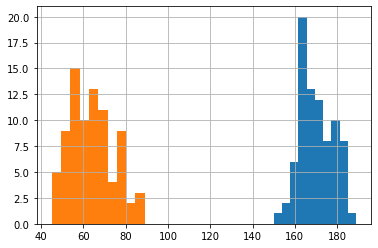

In [15]:
train['height'].hist()
train["weight"].hist()

Роста и веса мужчин

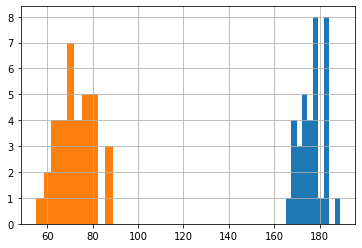

In [16]:
train_man= train.loc[train['sex_M'] ==1]
train_man['height'].hist()
train_man["weight"].hist()

Роста и веса женщин

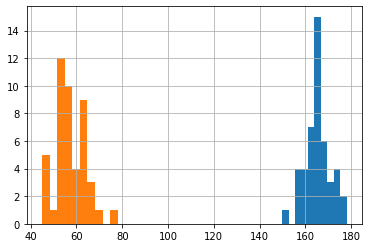

In [17]:
train_woman= train.loc[train['sex_M'] !=1]
train_woman['height'].hist()
train_woman["weight"].hist()

Величины (repwt - weight) в целом

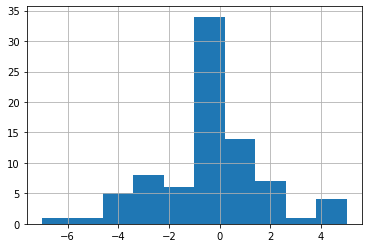

In [18]:
(train["repwt"]-train['weight']).hist()

Величины (repwt - weight) мужчин

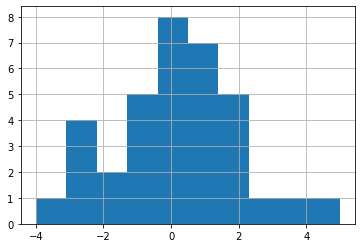

In [19]:
(train_man["repwt"]-train_man['weight']).hist()

Величины (repwt - weight) женщин

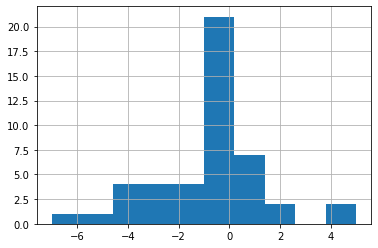

In [20]:
(train_woman["repwt"]-train_woman['weight']).hist()

Величины (repht - height) в целом

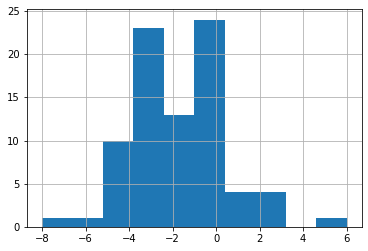

In [21]:
(train["repht"]-train['height']).hist()

Величины (repht - height) мужчин

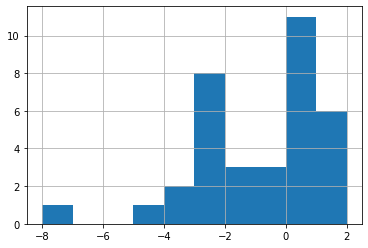

In [22]:
(train_man["repht"]-train_man['height']).hist()

Величины (repht - height) женщин

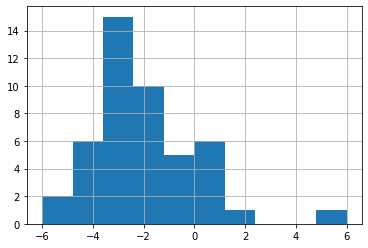

In [23]:
(train_woman["repht"]-train_woman['height']).hist()

# Построить генератор данных (sex, height, weight) 

Обращаемся к функции вычисления вероятности пола. Из дискретного распределения с определенной вероятностью выбирается пол.

In [109]:
class Generator:
    def __init__(self):
        self.p_woman=0
        self.p_man=0
        self.woman_D={}
        self.woman_cov=0
        self.woman_mean={}
        self.man_D={}
        self.man_cov=0
        self.man_mean={}
   
    def fit(self, df):
        woman=df.loc[df['sex_F'] ==1]
        man=df.loc[df['sex_M'] ==1]
        self.p_man=count_rel(df)
        self.p_woman=1-self.p_man
        self.woman_D['height']=self.getDisp(woman['height'])
        self.woman_D['weight']=self.getDisp(woman['weight'])
        self.man_D['height']=self.getDisp(man['height'])
        self.man_D['weight']=self.getDisp(man['weight'])
        self.woman_mean['height']=self.getMean(woman['height'])
        self.woman_mean['weight']=self.getMean(woman['weight'])
        self.man_mean['height']=self.getMean(man['height'])
        self.man_mean['weight']=self.getMean(man['weight'])
        self.man_cov=self.getCov(man['height'],man['weight'],"M" )
        self.woman_cov=self.getCov(woman['height'],woman['weight'],"W")

            
    def generate(self, n):
        X_man= np.random.multivariate_normal([self.man_mean['height'], self.man_mean['weight']],
                                             self.man_cov,size=n)
       
        X_woman=np.random.multivariate_normal([self.woman_mean['height'], self.woman_mean['weight']],
                                            self.woman_cov,size=n)
        sex_w, sex_m= self.make_Sex(n)
        
        data={}
        heights_all=[]
        weights_all=[]


        for i in range(n):
            if sex_w[i]==1:
                need= X_woman[i]
            else:
                need= X_man[i]
            heights_all.append(need[0])
            weights_all.append(need[1])    
    
        data['height']=heights_all
        data['weight']=weights_all   
        data["sex_F"]=sex_w
        data["sex_M"]=sex_m  
        generated_df=pandas.DataFrame(data)
        return generated_df        
    
    
    
    
    def like_hood(self, X):
        X_w=X[['weight', 'height']].loc[X['sex_F'] ==1]
        X_m=X[['weight', 'height']].loc[X['sex_M'] ==1]

        pdf_w =self.p_woman * ( scipy.stats.multivariate_normal.pdf(X_w,
                                                      mean=[self.woman_mean['height'], self.woman_mean['weight']],
                                                                    cov=self.woman_cov))
        

        
        pdf_m = self.p_man* (scipy.stats.multivariate_normal.pdf(X_m,mean=[self.man_mean['height'], self.man_mean['weight']],
                                                                 cov=self.man_cov))
        
        
        #print(list(pdf_w)+list(pdf_m))
        pdf=self.all_PDF(list(pdf_w)+list(pdf_m))
        print("HERE")
        print(pdf)
        
        
    def all_PDF(self, pdf):
        all=0
        for i in pdf:
            all+=np.log(i)
        print(all)
        
        return np.exp(all)
    def make_Sex(self, n):
        sex_W_arr=np.random.choice([0,1],n, p=[self.p_woman, self.p_man])
        sex_M_arr=np.abs(sex_W_arr-1)
        return [ sex_W_arr, sex_M_arr]
    def getDisp(self,df):
        std_=df.std()
        return std_**2
    def getMean(self,df):
        mean_= df.mean()
        return mean_
    def getCov(self, df_h, df_w,sex):
        cov_= np.cov(df_h, df_w)
        print("Ковариация ({}):  ".format(sex), cov_)
        return cov_
    

In [112]:
import scipy.stats
gen= Generator()
gen.fit(train.drop(['repwt' , 'repht'], axis = 'columns'))
X_=gen.generate(100)
X_


Ковариация (M):   [[30.93781513 19.38907563]
 [19.38907563 67.22184874]]
Ковариация (W):   [[30.06376812 19.31884058]
 [19.31884058 45.01642512]]


,height,weight,sex_F,sex_M
0,171.540178,74.371030,0,1
1,169.340287,73.297732,0,1
2,161.400536,51.531281,1,0
3,163.860931,53.898418,1,0
4,168.514837,64.964481,1,0
...,...,...,...,...
95,157.431442,50.395876,1,0
96,167.913865,73.753831,1,0
97,169.930045,84.204885,0,1
98,169.237053,62.891876,1,0


In [113]:
gen.like_hood(test.drop(['repwt' , 'repht'], axis = 'columns'))

gen.like_hood(train.drop(['repwt' , 'repht'], axis = 'columns'))

gen.like_hood(X_)

-inf
HERE
0.0
-inf
HERE
0.0
-inf
HERE
0.0


<ipython-input-109-148302d6f758>:83: RuntimeWarning: divide by zero encountered in log
  all+=np.log(i)


Построим точечный график для получившейся зависимости веса от роста у мужчин

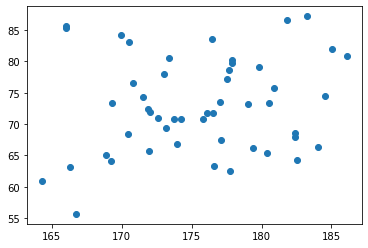

In [114]:
gen_man= X_.loc[X_['sex_M'] ==1]
plt.scatter(gen_man['height'],gen_man["weight"])


Построим точечный график для получившейся зависимости веса от роста у женщин

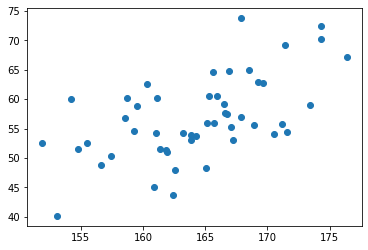

In [115]:
gen_woman= X_.loc[X_['sex_M'] !=1]
plt.scatter(gen_woman['height'],gen_woman["weight"])

# Задание 2

Для начала обучим модель LinearRegression предсказывать вес по росту

In [116]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
reg_h_train=train[["height"]].values.astype(np.float)
reg_w_train=train['weight'].values.astype(np.float)

lreg.fit(reg_h_train, reg_w_train)

LinearRegression()

In [117]:
lreg_pred=lreg.predict(test[["height"]])

Графически изобразим предсказание, которое дала модель

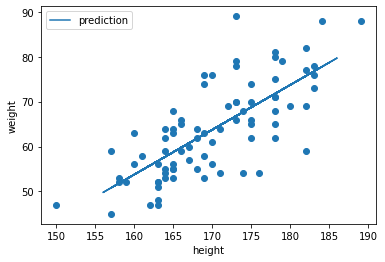

In [118]:
plt.scatter(train["height"], train['weight'])
plt.plot(test["height"], lreg_pred, label="prediction")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show()

Визуализируем минимизируемый критерий

In [119]:
def get_error(w_,predict_w,len_):
    err=[]
    for i in range(len_):
        err.append(1/len_*((w_[i]-predict_w[i])**2))
    return(err)

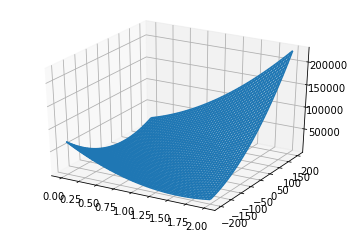

In [120]:
errs=get_error(test['weight'].values.astype(np.float),lreg_pred, len(lreg_pred ))
ww,bb = np.mgrid[0:2:200j, -200:200:200j]
err = []
h_ = train['height'].values.astype(np.float)
w_ = train['weight'].values.astype(np.float)
for w, b in zip(ww.ravel(),bb.ravel()):
    err.append(1/len(h_) * np.sum((w_ - w * h_ - b)**2))
err = np.array(err)
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, err.reshape(ww.shape))

В виде контура

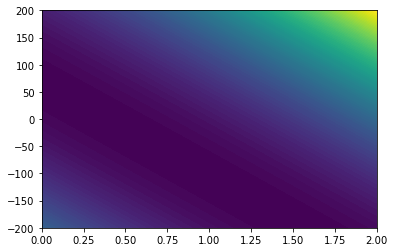

In [121]:
plt.contourf(ww,bb,err.reshape(ww.shape),levels=100)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)

Обучим модель предсказывать вес по формуле weight=w1∗height+w2∗[sex=M]+b 

In [122]:
new_train_df=train.drop(["sex_F", "repwt", "repht"], axis='columns')
new_train_df

,weight,height,sex_M
32,75,178,1
68,64,164,0
6,76,170,1
95,88,189,1
83,53,169,0
...,...,...,...
16,65,166,0
74,56,163,0
86,59,182,1
168,66,166,0


In [123]:
lr_new= LinearRegression()
lr_new.fit(new_train_df.drop(["weight"], axis=1).values.astype(np.float), new_train_df["weight"].values.astype(np.float))

LinearRegression()

In [124]:
new_test_df=test.drop(["sex_F","repwt","repht"], axis='columns')
lr_pred_new=lr_new.predict(new_test_df.drop(["weight"], axis=1).values.astype(np.float))

Проверим среднекв ошибку

In [125]:
from sklearn.metrics import mean_squared_error
mean_squared_error(new_test_df['weight'], lr_pred_new)

48.69879158739108

# Обучить градиентным спуском линейную модель

Получим необходимую тестовую выборку

In [126]:
gr_train_df=train.drop(["sex_F","sex_M","repwt","repht"], axis='columns')

Изменим масштаб данных, чтобы не застревать в плато функции

In [127]:
gr_train_df_scale = (gr_train_df - gr_train_df.mean()) / gr_train_df.std()

Визуализируем минимизируемый критерий

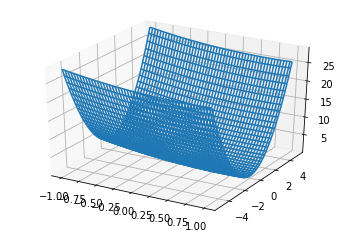

In [128]:
ww,bb = np.mgrid[-1:1:200j, -5:5:200j]
L = []
for w, b in zip(ww.ravel(),bb.ravel()):
    L.append(1/len(gr_train_df_scale['height'].values) * np.sum((gr_train_df_scale['weight'].values - w * gr_train_df_scale['height'].values - b)**2))
L = np.array(L)
fig = plt.figure()
ax = fig.add_subplot('111', projection='3d')
ax.plot_wireframe(ww, bb, L.reshape(ww.shape))

В виде контура:

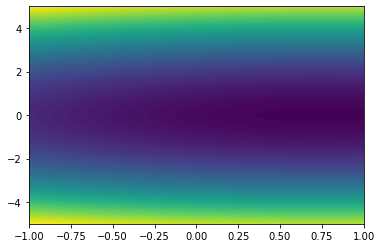

In [129]:
plt.contourf(ww,bb,L.reshape(ww.shape),levels=100)
www = np.linspace(ww.min(),ww.max(),4)
bbb = np.linspace(bb.min(),bb.max(),4)

Применим метод градиентного спуска и найдем оптимальные параметры w и b

In [130]:
w = 1
b = 1
alpha = 0.002

x = gr_train_df_scale['height'].values
y = gr_train_df_scale['weight'].values
N = len(x)
E = 2



for i in range(9300):
    min_ = (1/N * np.sum((y - w * x - b)**2))
    d_yh = (w * x + b - y)
    d_w = np.mean(d_yh * x)
    d_b = np.mean(d_yh)
    norm = np.sqrt(d_w**2 + d_b**2)
    
    if norm > E:
        small_n = norm / E
        d_w = d_w/ small_n
        d_b = d_b / small_n
    w = w - alpha * d_w
    b = b - alpha * d_b
print("w= {} , b = {}".format(w,b))
print("min = {}".format( min_))

w= 0.7408304123142259 , b = 8.20415790176992e-09
min = 0.44560030040077336


Проверим правильно ли был найден коэффициент w

In [131]:
gr_lr = LinearRegression().fit(gr_train_df_scale['height'].values.reshape(-1,1),gr_train_df_scale['weight'].values)
gr_lr.coef_[0]

0.740830409637872